# Model creation

## Libs

In [1]:
from prepareRSSI import RssiDatas
import pandas as pd
import parameters as param
import numpy as np
import tensorflow as tf
#import intel-tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K # to set the learning rate


2022-06-18 17:38:23.637126: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-18 17:38:23.639978: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-18 17:38:23.639987: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Import the RSSI, mac and zones values

In [2]:
RSSI = RssiDatas()

#df = pd.read_csv(param.rssi_csv_output)
#df.head(100)

rssi_tmp = np.genfromtxt(param.rssi_csv_output, delimiter=',')
# deleting index column and row :
rssi_tmp = np.delete(rssi_tmp, 0, 1)
RSSI.rssi = np.delete(rssi_tmp, 0, 0)

print("RSSI shape :",np.shape(RSSI.rssi))
print("RSSI :\n",RSSI.rssi)

mac_tmp = np.genfromtxt(param.mac_csv_output, delimiter=',', dtype=str)
# deleting index column and row :
mac_tmp = mac_tmp[:,1] # keep only the column with the mac adresses
RSSI.mac = np.delete(mac_tmp, 0) # delete the first row because empty
print("mac size : ", np.size(RSSI.mac))
#print("mac :\n",RSSI.mac)

zones_tmp = np.genfromtxt(param.zones_csv_output, delimiter=',')
# deleting index column and row :
zones_tmp = zones_tmp[:,1] # keep only the colomn with the zone ids
RSSI.zones = np.delete(zones_tmp, 0, 0) # delete the first row because empty

print("Zones size :",np.size(RSSI.zones))
print("Zones :\n",RSSI.zones)

RSSI shape : (265, 128)
RSSI :
 [[-72.   -70.   -78.   ... -95.   -95.   -95.  ]
 [-67.25 -69.   -80.5  ... -95.   -95.   -95.  ]
 [-66.   -68.   -79.   ... -95.   -95.   -95.  ]
 ...
 [-68.   -68.   -60.   ... -83.   -95.   -83.  ]
 [-64.   -69.   -63.   ... -95.   -95.   -83.  ]
 [-67.   -67.   -63.   ... -95.   -95.   -83.  ]]
mac size :  128
Zones size : 265
Zones :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.

## Create training and test dataset

## Create the model

## Train the model

## Load data

In [3]:
print(RSSI.rssi)

[[-72.   -70.   -78.   ... -95.   -95.   -95.  ]
 [-67.25 -69.   -80.5  ... -95.   -95.   -95.  ]
 [-66.   -68.   -79.   ... -95.   -95.   -95.  ]
 ...
 [-68.   -68.   -60.   ... -83.   -95.   -83.  ]
 [-64.   -69.   -63.   ... -95.   -95.   -83.  ]
 [-67.   -67.   -63.   ... -95.   -95.   -83.  ]]


In [4]:
print("RSSI.rssi : ", np.shape(RSSI.rssi))
print("RSSI.zones : ", np.shape(RSSI.zones))
train_data, test_data, train_labels, test_labels = train_test_split(RSSI.rssi,RSSI.zones)
print("train_data : ", np.shape(train_data))
print("train_labels : ", np.shape(train_labels))
print("test_data : ", np.shape(test_data))
print("test_labels : ", np.shape(test_labels))
train_data = train_data/(-95)
test_data = test_data/(-95)
train_labels = train_labels/6
test_labels = test_labels/6
print(train_data)

RSSI.rssi :  (265, 128)
RSSI.zones :  (265,)
train_data :  (198, 128)
train_labels :  (198,)
test_data :  (67, 128)
test_labels :  (67,)
[[0.62105263 0.67368421 0.69473684 ... 0.87368421 0.87368421 1.        ]
 [0.70526316 0.67368421 0.69473684 ... 1.         1.         1.        ]
 [0.62105263 0.68421053 0.77894737 ... 1.         1.         1.        ]
 ...
 [0.69473684 0.75789474 0.8        ... 1.         1.         1.        ]
 [0.70526316 0.83157895 0.74736842 ... 1.         1.         1.        ]
 [0.83157895 0.83157895 0.83157895 ... 1.         1.         1.        ]]


## Create the model

In [5]:
model = tf.keras.models.Sequential([
  #tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.Dense(10)
])

2022-06-18 17:38:25.082496: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-18 17:38:25.082520: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-18 17:38:25.082536: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (romain-framework): /proc/driver/nvidia/version does not exist
2022-06-18 17:38:25.082719: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Compile the model

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate, param.learningRate)

## Train the model

In [7]:
# feed the model :
print(np.shape(train_data))
print(np.shape(train_labels))
history = model.fit(train_data, train_labels, epochs=200)
# evaluate accuracy
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

(198, 128)
(198,)
Epoch 1/200
7/7 [==============================] - 0s 2ms/step - loss: 4.9481 - accuracy: 0.0000e+00
Epoch 2/200
7/7 [==============================] - 0s 1ms/step - loss: 4.8994 - accuracy: 0.0000e+00
Epoch 3/200
7/7 [==============================] - 0s 1ms/step - loss: 4.8513 - accuracy: 0.0000e+00
Epoch 4/200
7/7 [==============================] - 0s 2ms/step - loss: 4.8033 - accuracy: 0.0000e+00
Epoch 5/200
7/7 [==============================] - 0s 1ms/step - loss: 4.7549 - accuracy: 0.0000e+00
Epoch 6/200
7/7 [==============================] - 0s 1ms/step - loss: 4.7079 - accuracy: 0.0000e+00
Epoch 7/200
7/7 [==============================] - 0s 1ms/step - loss: 4.6610 - accuracy: 0.0000e+00
Epoch 8/200
7/7 [==============================] - 0s 1ms/step - loss: 4.6144 - accuracy: 0.0000e+00
Epoch 9/200
7/7 [==============================] - 0s 1ms/step - loss: 4.5678 - accuracy: 0.0000e+00
Epoch 10/200
7/7 [==============================] - 0s 1ms/step - loss: 4

7/7 [==============================] - 0s 1ms/step - loss: 1.4001 - accuracy: 0.0960
Epoch 84/200
7/7 [==============================] - 0s 1ms/step - loss: 1.3744 - accuracy: 0.0960
Epoch 85/200
7/7 [==============================] - 0s 1ms/step - loss: 1.3498 - accuracy: 0.0960
Epoch 86/200
7/7 [==============================] - 0s 1ms/step - loss: 1.3263 - accuracy: 0.0960
Epoch 87/200
7/7 [==============================] - 0s 1ms/step - loss: 1.3035 - accuracy: 0.0960
Epoch 88/200
7/7 [==============================] - 0s 1ms/step - loss: 1.2823 - accuracy: 0.0960
Epoch 89/200
7/7 [==============================] - 0s 1ms/step - loss: 1.2617 - accuracy: 0.0960
Epoch 90/200
7/7 [==============================] - 0s 1ms/step - loss: 1.2421 - accuracy: 0.0960
Epoch 91/200
7/7 [==============================] - 0s 1ms/step - loss: 1.2239 - accuracy: 0.0960
Epoch 92/200
7/7 [==============================] - 0s 988us/step - loss: 1.2060 - accuracy: 0.0960
Epoch 93/200
7/7 [=============

Epoch 166/200
7/7 [==============================] - 0s 1ms/step - loss: 0.8475 - accuracy: 0.0960
Epoch 167/200
7/7 [==============================] - 0s 1ms/step - loss: 0.8471 - accuracy: 0.0960
Epoch 168/200
7/7 [==============================] - 0s 1ms/step - loss: 0.8467 - accuracy: 0.0960
Epoch 169/200
7/7 [==============================] - 0s 1ms/step - loss: 0.8463 - accuracy: 0.0960
Epoch 170/200
7/7 [==============================] - 0s 1ms/step - loss: 0.8460 - accuracy: 0.0960
Epoch 171/200
7/7 [==============================] - 0s 978us/step - loss: 0.8456 - accuracy: 0.0960
Epoch 172/200
7/7 [==============================] - 0s 1ms/step - loss: 0.8452 - accuracy: 0.0960
Epoch 173/200
7/7 [==============================] - 0s 1ms/step - loss: 0.8449 - accuracy: 0.0960
Epoch 174/200
7/7 [==============================] - 0s 1ms/step - loss: 0.8445 - accuracy: 0.0960
Epoch 175/200
7/7 [==============================] - 0s 1ms/step - loss: 0.8441 - accuracy: 0.0960
Epoch 17

## Ploting learning datas

Text(0.5, 0, 'Epoch')

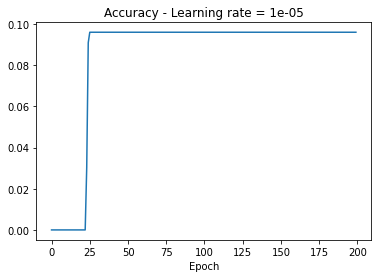

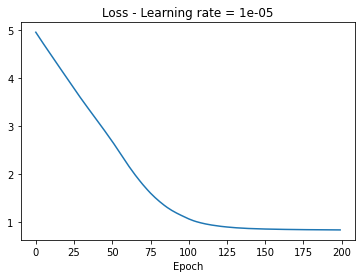

In [9]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

plt.figure(1)
plt.plot(acc, label="train_acc")
#plt.plot(val_acc,color="red", label="train_acc")
plt.title("Accuracy - Learning rate = " + str(param.learningRate))
plt.xlabel("Epoch")
#name = "plot_accuracy_lr_" + str(learningRate) + ".svg"
#name = name.replace(".", ",", 1)
#plt.savefig(name, format="svg")

plt.figure(2)
plt.plot(loss, label="train_loss")
#plt.plot(val_loss,color="red", label="val_loss")
plt.title("Loss - Learning rate = " + str(param.learningRate))
plt.xlabel("Epoch")
#name = "plot_loss_lr_" + str(learningRate) + ".svg"
#name = name.replace(".", ",", 1)
#plt.savefig(name, format="svg")

